In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
titanic_data = pd.read_csv("D:\Amir Ali\Data Science\Datasets projects\dataset1-master\Titanic_train.csv")
# Lets copy the data frame for later use
titanic_copy = titanic_data.copy()
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
titanic_data.describe(include = 'all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"O'Connell, Mr. Patrick D",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Lets do basic Analysis

•   There are 891 observations/rows.

•   891 - 714 = 177 Passengers age is missing.

•	891 - 889 = 2 Passenger Embarked Data is Missing. 

•	891 - 204 = 687 Passengers cabin data is missing. 

•	The frequency of Male was 577, frequency of Female was 314.

•	The average passengers age from given data was 29 

•	Most Senior passenger was 80 years old, Younger child was around 4 months, age range(0.4 to 80).

In [5]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

its validated that above missing data analysis is true from the data description

# Lets clean the data 

In [6]:
#First we will drop cabin data as it has lot of missing data
titanic_data.drop('Cabin', axis = 1, inplace = True) # axis 1 is use to select column


In [7]:
# We also have 2 Embarked missing values let drop those values by using dropna.

titanic_data.dropna(subset = ['Embarked'],  inplace = True)

In [8]:
print(titanic_data['Name'].tolist)

<bound method IndexOpsMixin.tolist of 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 889, dtype: object>


In [9]:
#We can see Name is mentioned with title and commas, we can use split to check unique titles

#As we can see Name is sperated with, and .dots and whitespaces & special character, Lets find titles

titanic_data ['Title'] = titanic_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
#We use lambda expression to store split data, 
#.strip will help us to remove 'WHITESPACES' and special character


In [10]:
print(titanic_data['Title'].tolist)

<bound method IndexOpsMixin.tolist of 0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 889, dtype: object>


In [11]:
# Lets store unique titles into a variable
uni_title = titanic_data['Title'].unique() # .unique() is use to fetch only unique values available in the dataset
print(uni_title)
len(uni_title)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


17

We have 17 unique titles

In [12]:
# Lets count the titles by creating groups of each titles
grp_title = titanic_data['Age'].fillna(titanic_data.groupby('Title')['Age'].transform('mean')) 
# fill all 177 age's missing values by the mean of the grp_title
titanic_data['Age'] = grp_title 
print(grp_title)
print('Mean/Average age by group title = ',np.mean(grp_title))# mean of the group title

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    21.662069
889    26.000000
890    32.000000
Name: Age, Length: 889, dtype: float64
Mean/Average age by group title =  29.699916095131066


In [13]:
# Lets drop 'Name' column as we have already done the anaysis
titanic_data.drop(['Name'], axis = 1, inplace = True)
#titanic_data.drop(['PassengerId', 'Name'], axis = 1, inplace = True)

titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr


# Lets's check if we have filled all the missing values

In [14]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

Let's work on Ticket variable

In [15]:
titanic_data['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

The ticket are combination of alphabets and numericals 

In [16]:
#Lets sperate alpha numeric in new column 'Titcket_type'
titanic_data ['Ticket_type'] = titanic_data['Ticket'].apply(lambda x:x.split()[0] if len(x.split())>1 else '0')
# If only numeric value in the ticket we will put 0

print(titanic_data['Ticket_type'])

0           A/5
1            PC
2      STON/O2.
3             0
4             0
         ...   
886           0
887           0
888       W./C.
889           0
890           0
Name: Ticket_type, Length: 889, dtype: object


In [17]:
titanic_data.groupby('Ticket_type').count()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
Ticket_type,,,,,,,,,,,
0,663,663,663,663,663,663,663,663,663,663,663
A./5.,2,2,2,2,2,2,2,2,2,2,2
A.5.,2,2,2,2,2,2,2,2,2,2,2
A/4,3,3,3,3,3,3,3,3,3,3,3
A/4.,3,3,3,3,3,3,3,3,3,3,3
A/5,10,10,10,10,10,10,10,10,10,10,10
A/5.,7,7,7,7,7,7,7,7,7,7,7
A/S,1,1,1,1,1,1,1,1,1,1,1
A4.,1,1,1,1,1,1,1,1,1,1,1


In [18]:
titanic_data['Ticket_type'] = titanic_data['Ticket_type'].apply(lambda x:x[0])
titanic_data.groupby('Ticket_type').count()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
Ticket_type,,,,,,,,,,,
0,663,663,663,663,663,663,663,663,663,663,663
A,29,29,29,29,29,29,29,29,29,29,29
C,47,47,47,47,47,47,47,47,47,47,47
F,7,7,7,7,7,7,7,7,7,7,7
P,65,65,65,65,65,65,65,65,65,65,65
S,65,65,65,65,65,65,65,65,65,65,65
W,13,13,13,13,13,13,13,13,13,13,13


In [19]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Ticket_type
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,A
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,P
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr,0


In [20]:
#We alredy perform analysis on 'Ticket' & 'Title' we can drop the columns


titanic_data.drop(['Ticket'], axis = 1, inplace = True)
titanic_data.drop(['Title'], axis = 1, inplace = True)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_type
0,1,0,3,male,22.0,1,0,7.2500,S,A
1,2,1,1,female,38.0,1,0,71.2833,C,P
2,3,1,3,female,26.0,0,0,7.9250,S,S
3,4,1,1,female,35.0,1,0,53.1000,S,0
4,5,0,3,male,35.0,0,0,8.0500,S,0


Lets clean rest of the data that can be droped like Title which we already analysis

In [21]:
#titanic_data.head()
titanic_data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.000000      1      0   7.2500   
1              2         1       1  female  38.000000      1      0  71.2833   
2              3         1       3  female  26.000000      0      0   7.9250   
3              4         1       1  female  35.000000      1      0  53.1000   
4              5         0       3    male  35.000000      0      0   8.0500   
..           ...       ...     ...     ...        ...    ...    ...      ...   
886          887         0       2    male  27.000000      0      0  13.0000   
887          888         1       1  female  19.000000      0      0  30.0000   
888          889         0       3  female  21.662069      1      2  23.4500   
889          890         1       1    male  26.000000      0      0  30.0000   
890          891         0       3    male  32.000000      0      0   7.7500   

    Emb

In [22]:
#We can drop Passenger Id as it doesnt have relation with survivors.

titanic_data.drop(['PassengerId'], axis = 1, inplace = True)


In [23]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_type
0,0,3,male,22.0,1,0,7.2500,S,A
1,1,1,female,38.0,1,0,71.2833,C,P
2,1,3,female,26.0,0,0,7.9250,S,S
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,0


As we analysis that ticket type has high relationship with target variable, we will keep that and drop the unacessary informations

# EDA Exploratory Data Analysis

<AxesSubplot:>

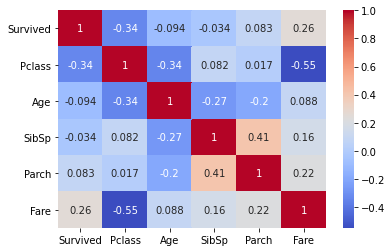

In [24]:
corr_mat = titanic_data.corr()
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')


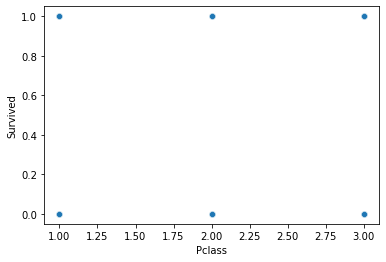

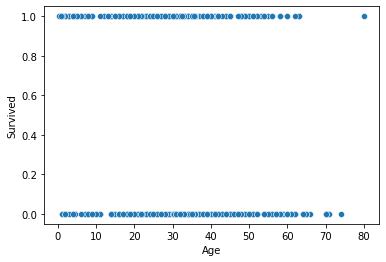

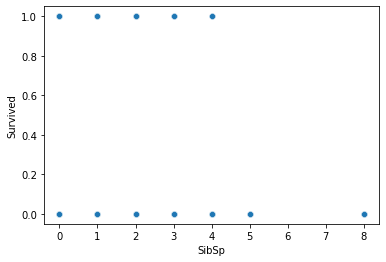

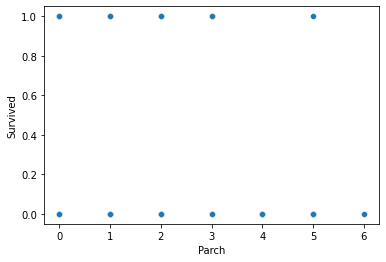

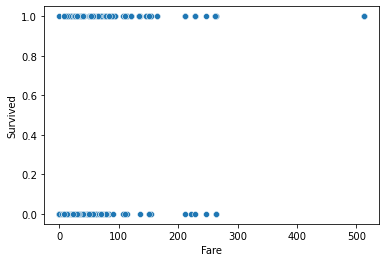

In [25]:
#scatter plot

sns.scatterplot(x = 'Pclass', y = 'Survived', data = titanic_data)
plt.show()

sns.scatterplot(x = 'Age', y = 'Survived', data = titanic_data)
plt.show()

sns.scatterplot(x = 'SibSp', y = 'Survived', data = titanic_data)
plt.show()

sns.scatterplot(x = 'Parch', y = 'Survived', data = titanic_data)
plt.show()

sns.scatterplot(x = 'Fare', y = 'Survived', data = titanic_data)
plt.show()

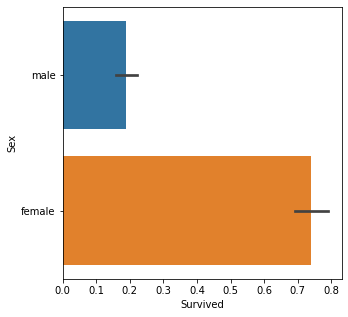

In [26]:
# Lets check how many survived based on gender using boxplot
plt.figure(figsize = (5,5))
sns.barplot(x = 'Survived', y = 'Sex', data = titanic_data)
plt.show()

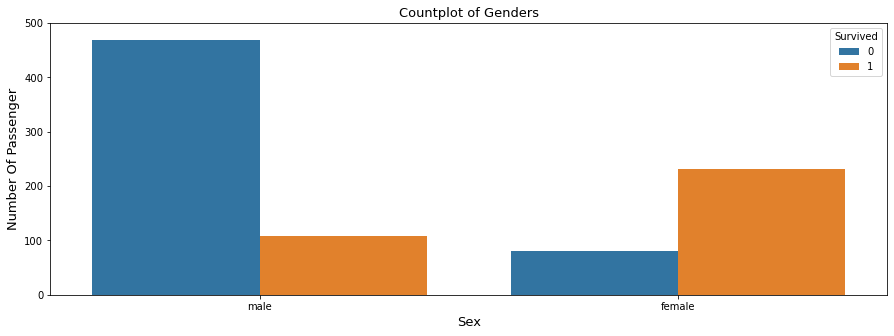

In [27]:
#lets use countplot to make it more clearily visualize
fig, (ax1) = plt.subplots(1, figsize = (15,5))

sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_data, ax = ax1)
# countplot is use to count of observations in each bin
ax1.set_ylim([0,500]) # is use to y axis range 
ax1.set_xlabel ('Sex', fontdict = {'fontsize': 13})
ax1.set_ylabel ('Number Of Passenger', fontdict = {'fontsize': 13})
ax1.set_title('Countplot of Genders', fontdict = {'fontsize':13})
plt.show()


By reading this diagram we can say femals survived more than male

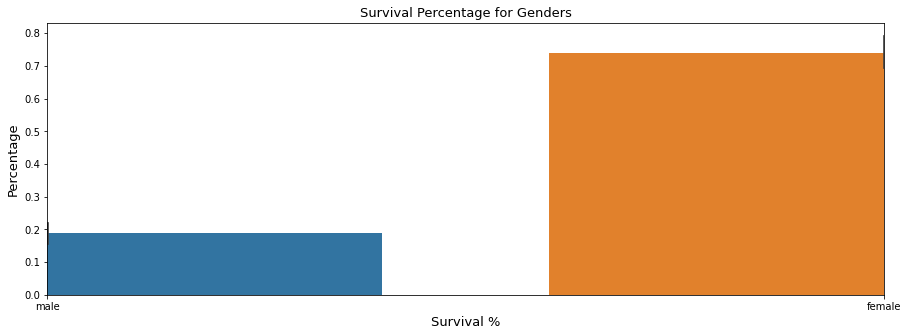

In [28]:
# Lets find survival percentage for genders

fig, (ax2) = plt.subplots(1, figsize = (15, 5))

sns.barplot(x = 'Sex', y = 'Survived', data = titanic_data, ax = ax2)
ax2.set_xlim([0,1]) 
ax2.set_xlabel('Survival %', fontdict = {'fontsize': 13})
ax2.set_ylabel('Percentage', fontdict = {'fontsize':13})
ax2.set_title('Survival Percentage for Genders', fontdict = {'fontsize':13})
plt.show()

Lets find relationship between ticket type we extracted and survivors

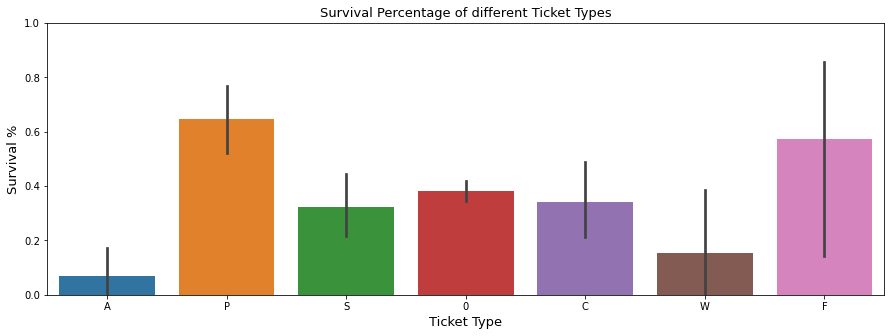

In [29]:
fig, (ax1) = plt.subplots(1, figsize = (15,5))

sns.barplot(x = 'Ticket_type', y = 'Survived', data = titanic_data, ax = ax1)
ax1.set_title('Survival Percentage of different Ticket Types', fontdict ={'fontsize':13})
ax1.set_ylim([0,1])
ax1.set_xlabel('Ticket Type', fontdict = {'fontsize':13})
ax1.set_ylabel('Survival %', fontdict = {'fontsize':13})
plt.show()


Survival percentage for different ticket types are different where 'A' has minimum and 'P' has maximum

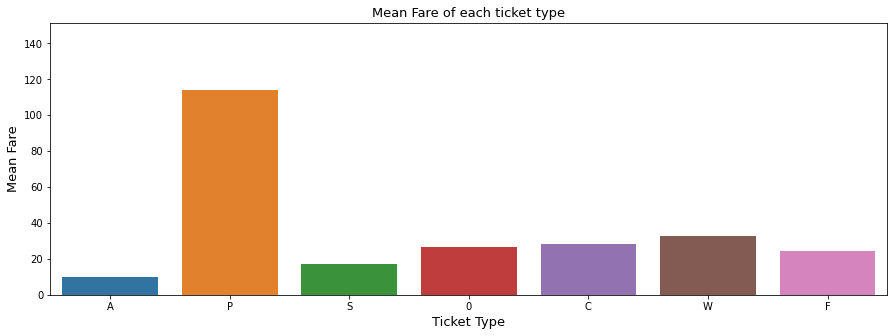

In [30]:
#Lets try to find fare of each ticket type
fig , (ax2) = plt.subplots(figsize = (15,5))
sns.barplot(x = 'Ticket_type', y = 'Fare', data = titanic_data, ax = ax2, errwidth = 0)
ax2.set_title('Mean Fare of each ticket type', fontdict = {'fontsize':13})
ax2.set_xlabel('Ticket Type', fontdict = {'fontsize':13})
ax2.set_ylabel('Mean Fare', fontdict = {'fontsize':13})
plt.show()


As we have already observed that ticket type 'P' has maximum number of survivors, its clear that ticket type 'P'
also most costly among all

any information can not explained by one feauture, We can also observe that t-type 'F' has seccond most survivor while ticket price of 'F' is low compare to other 

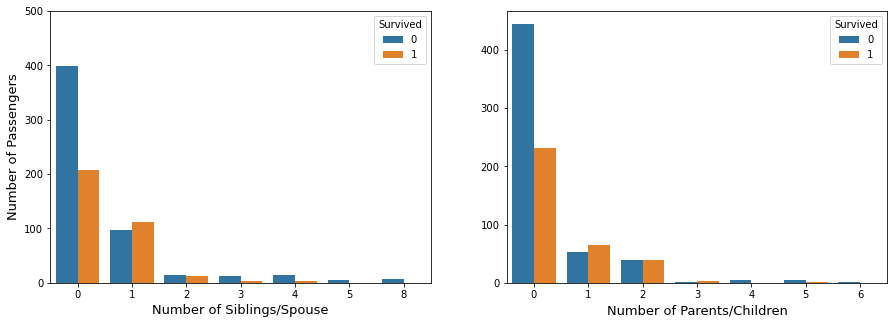

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))

sns.countplot(x = 'SibSp', data = titanic_data, hue = 'Survived', ax = ax1)
ax1.set_ylim([0,500])
ax1.set_xlabel('Number of Siblings/Spouse', fontdict = {'fontsize': 13})
ax1.set_ylabel('Number of Passengers', fontdict = {'fontsize': 13})
ax1.legend(loc = 'upper right', title = 'Survived')

sns.countplot(x = 'Parch', data = titanic_data, hue = 'Survived', ax = ax2)
ax2.set_xlabel('Number of Parents/Children', fontdict = {'fontsize':13})
ax2.set_ylabel('')
ax2.legend(loc = 'upper right', title = 'Survived')

plt.show()

We can say people having family are more survived compare to people no families

In [32]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_type
0,0,3,male,22.0,1,0,7.2500,S,A
1,1,1,female,38.0,1,0,71.2833,C,P
2,1,3,female,26.0,0,0,7.9250,S,S
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,0


# Model Building

In [33]:
titanic_data = pd.get_dummies(titanic_data, drop_first = True)
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Ticket_type_A,Ticket_type_C,Ticket_type_F,Ticket_type_P,Ticket_type_S,Ticket_type_W
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,0


In [34]:
#first divide data into dependent and independent variables

X = titanic_data.drop('Survived', axis = 1)
Y = titanic_data['Survived']

#lets split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .25, random_state = 30)

In [35]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(666, 14)
(666,)
(223, 14)
(223,)


# Model Selection

In [36]:
#Linear Regression

lr = LinearRegression()#instance
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
lr_score = lr.score(X_test, Y_test)

print('Linear Regression Score : ', lr_score)

Linear Regression Score :  0.3560374813332918


In [37]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')  

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
log_pred = log_reg.predict(X_train)
log_score = log_reg.score(X_test, Y_test)

print('Logistic Regression Score: ', log_score)

Logistic Regression Score:  0.7937219730941704


In [38]:
#Lets check the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(Y_train, log_reg.predict(X_train))

array([[364,  50],
       [ 69, 183]], dtype=int64)

In [39]:
print(classification_report(Y_train,log_reg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       414
           1       0.79      0.73      0.75       252

    accuracy                           0.82       666
   macro avg       0.81      0.80      0.81       666
weighted avg       0.82      0.82      0.82       666



# Test the data

In [40]:
log_reg = LogisticRegression()
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
log_pred = log_reg.predict(X_train)
def survivor(p):
    p =p.reshape(1,-1)
    pred = log_reg.predict(p)
    print("predicted value ", pred)
    if pred == 0:
        print("Passanger survived")
    else:
        print('Passenger dont survived')

In [41]:
#lets take two rows data to test if its working fine
import numpy as np
p = np.array([3,22.0,1,0,7.2500,1,0,1,1,0,0,0,0,0])
print(survivor(p))

p1 = np.array([1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0])
print(survivor(p1))

# log_reg.predict(p)

predicted value  [0]
Passanger survived
None
predicted value  [1]
Passenger dont survived
None


In [42]:
titanic_data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Ticket_type_A,Ticket_type_C,Ticket_type_F,Ticket_type_P,Ticket_type_S,Ticket_type_W
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0


# Thanks It was great learning!! 